# ======================================================================
# TUGAS AKHIR MACHINE LEARNING - FOREST FIRES ANALYSIS
# Dataset: Forest Fires dari UCI Machine Learning Repository
# Tujuan: Prediksi luas area terbakar berdasarkan kondisi meteorologi
# Algoritma: Random Forest, XGBoost, SVR
# ======================================================================

# STEP 1: Import Libraries dan Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)

print("="*60)
print("FOREST FIRES ANALYSIS - MACHINE LEARNING PROJECT")
print("="*60)

FOREST FIRES ANALYSIS - MACHINE LEARNING PROJECT


# ====================================================================
# STEP 2: Data Loading dan Initial Exploration
# ======================================================================


In [7]:
data = pd.read_csv('forestfires.csv')
print("✅ Dataset 'forestfires.csv' berhasil dimuat.")

✅ Dataset 'forestfires.csv' berhasil dimuat.


In [8]:
# Menampilkan bentuk (shape) dari dataset
print(f"Bentuk Dataset: {data.shape}")
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")

Bentuk Dataset: (517, 13)
Jumlah baris: 517
Jumlah kolom: 13


In [9]:
# Menampilkan informasi ringkas termasuk tipe data dan non-null values
print("📋 Informasi Dasar Dataset:")
data.info()

📋 Informasi Dasar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [11]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\n📊 Ringkasan Statistik:")
print(data.describe())


📊 Ringkasan Statistik:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.7916

In [12]:
# Memeriksa apakah ada nilai yang hilang (missing values)
print("\n❓ Pengecekan Missing Values:")
missing_values = data.isnull().sum()

if missing_values.sum() == 0:
    print("✅ Tidak ada missing values dalam dataset.")
else:
    print("Data yang hilang ditemukan pada kolom berikut:")
    print(missing_values[missing_values > 0])


❓ Pengecekan Missing Values:
✅ Tidak ada missing values dalam dataset.


In [13]:
# Menganalisis distribusi dari variabel target 'area'
print("\n🎯 Analisis Variabel Target (area):")
print(f"Nilai Minimum: {data['area'].min()}")
print(f"Nilai Maksimum: {data['area'].max()}")
print(f"Rata-rata (Mean): {data['area'].mean():.2f}")
print(f"Nilai Tengah (Median): {data['area'].median():.2f}")
print(f"Simpangan Baku (Std Dev): {data['area'].std():.2f}")


🎯 Analisis Variabel Target (area):
Nilai Minimum: 0.0
Nilai Maksimum: 1090.84
Rata-rata (Mean): 12.85
Nilai Tengah (Median): 0.52
Simpangan Baku (Std Dev): 63.66


In [14]:
# Menghitung perbandingan antara kebakaran dengan area 0 dan lebih dari 0
print("\n🔥 Distribusi Area Kebakaran:")
zero_fires = (data['area'] == 0).sum()
non_zero_fires = (data['area'] > 0).sum()

print(f"Jumlah kebakaran dengan area = 0: {zero_fires} ({zero_fires/len(data)*100:.1f}%)")
print(f"Jumlah kebakaran dengan area > 0: {non_zero_fires} ({non_zero_fires/len(data)*100:.1f}%)")


🔥 Distribusi Area Kebakaran:
Jumlah kebakaran dengan area = 0: 247 (47.8%)
Jumlah kebakaran dengan area > 0: 270 (52.2%)


# ==============================================================
# STEP 3: Exploratory Data Analysis (EDA)
# ================================================================


In [15]:
# Mengatur style plot agar lebih menarik
sns.set_theme(style="whitegrid")

print("✅ Library untuk visualisasi berhasil di-load.")

✅ Library untuk visualisasi berhasil di-load.


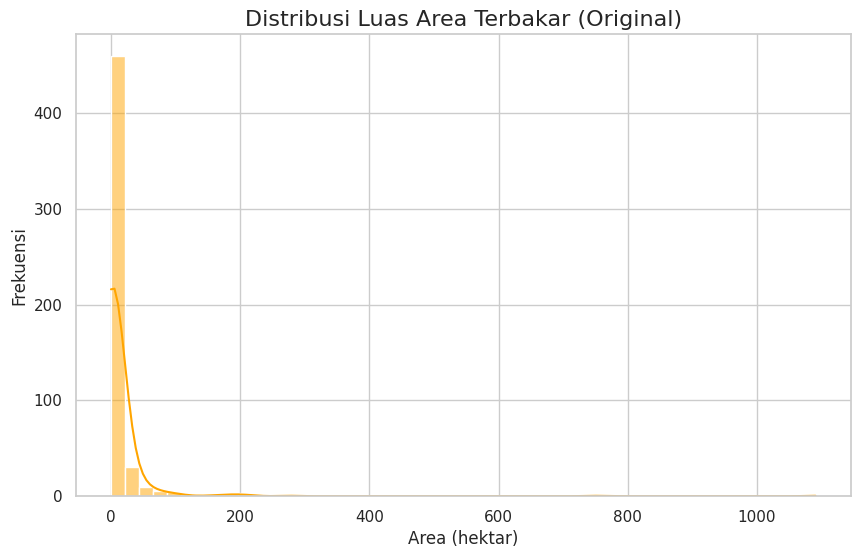

In [16]:
# Membuat plot untuk distribusi 'area'
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=50, kde=True, color='orange')
plt.title('Distribusi Luas Area Terbakar (Original)', fontsize=16)
plt.xlabel('Area (hektar)')
plt.ylabel('Frekuensi')
plt.show()

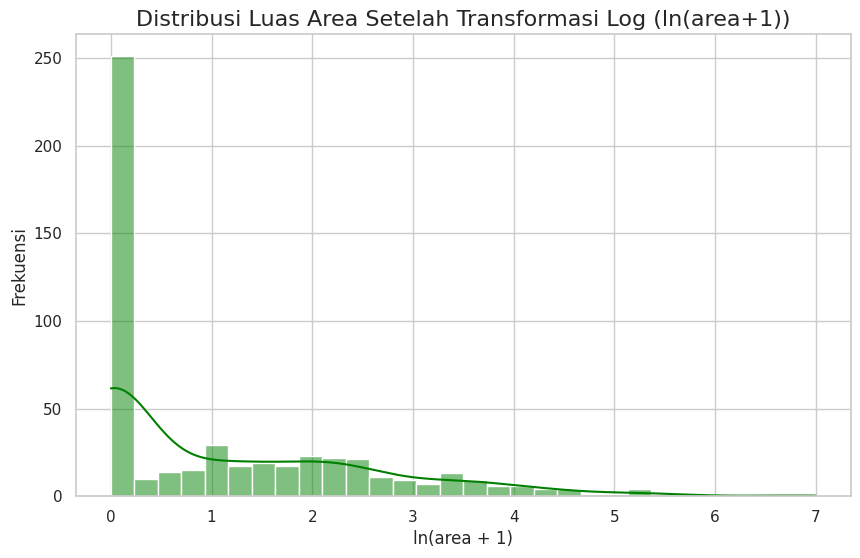

In [17]:
# Menerapkan transformasi log(x+1) untuk mengatasi kemiringan data
log_area = np.log1p(data['area'])

# Membuat plot untuk distribusi 'area' yang sudah ditransformasi
plt.figure(figsize=(10, 6))
sns.histplot(log_area, bins=30, kde=True, color='green')
plt.title('Distribusi Luas Area Setelah Transformasi Log (ln(area+1))', fontsize=16)
plt.xlabel('ln(area + 1)')
plt.ylabel('Frekuensi')
plt.show()

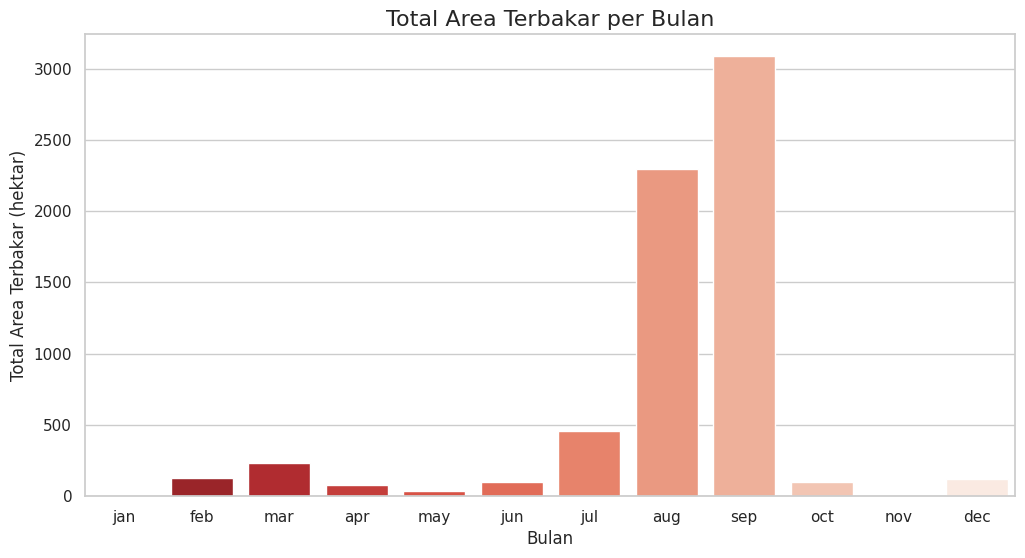

In [18]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan area
monthly_fires = data.groupby('month')['area'].sum()

# Mengurutkan bulan secara kronologis
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_fires = monthly_fires.reindex(month_order)

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_fires.index, y=monthly_fires.values, palette='Reds_r')
plt.title('Total Area Terbakar per Bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Total Area Terbakar (hektar)')
plt.show()

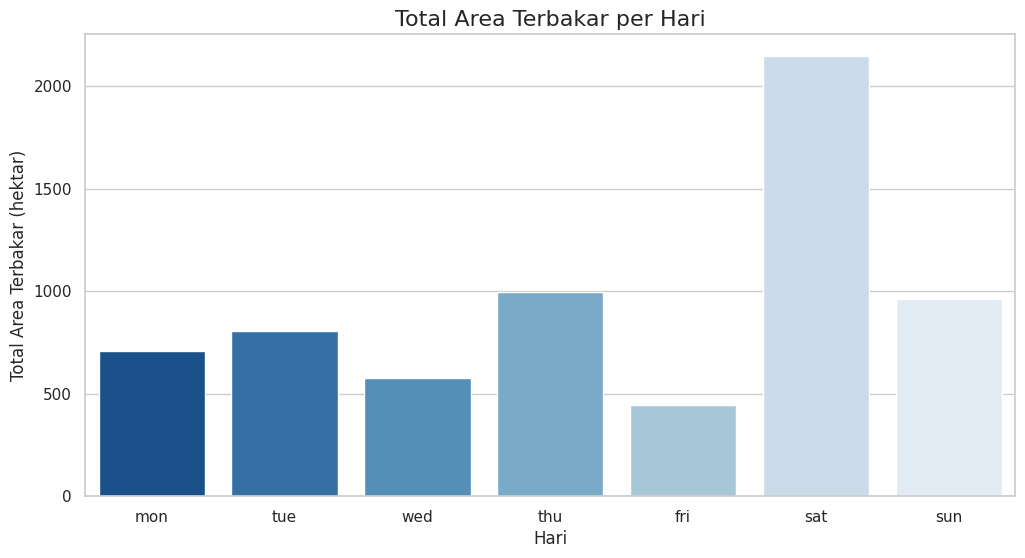

In [19]:
# Mengelompokkan data berdasarkan hari dan menjumlahkan area
daily_fires = data.groupby('day')['area'].sum()

# Mengurutkan hari dalam seminggu
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
daily_fires = daily_fires.reindex(day_order)

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_fires.index, y=daily_fires.values, palette='Blues_r')
plt.title('Total Area Terbakar per Hari', fontsize=16)
plt.xlabel('Hari')
plt.ylabel('Total Area Terbakar (hektar)')
plt.show()

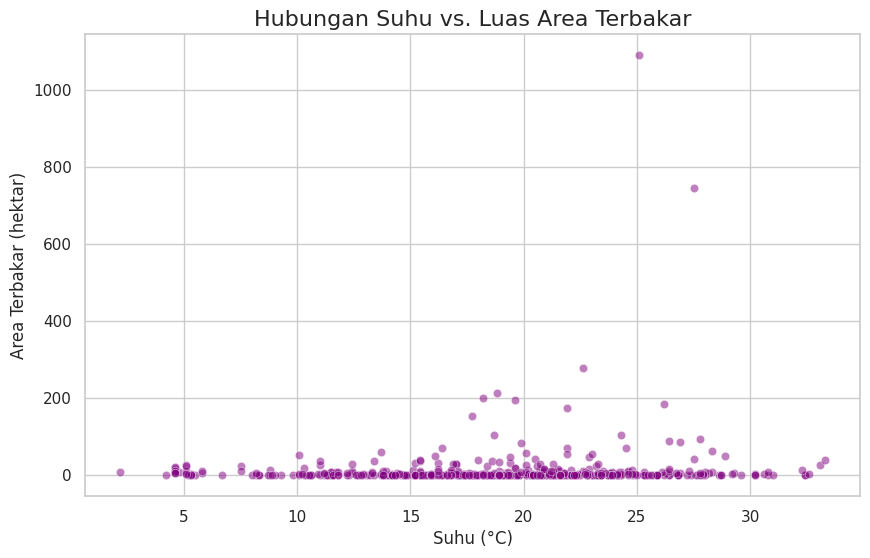

In [20]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='area', data=data, alpha=0.5, color='purple')
plt.title('Hubungan Suhu vs. Luas Area Terbakar', fontsize=16)
plt.xlabel('Suhu (°C)')
plt.ylabel('Area Terbakar (hektar)')
plt.show()

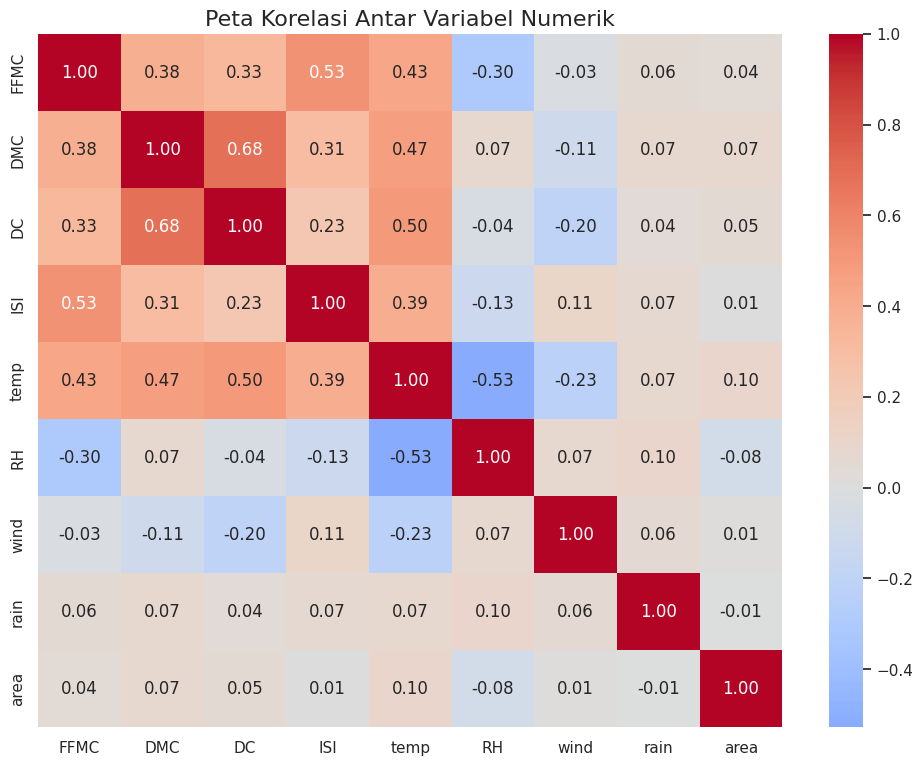

In [21]:
# Memilih hanya kolom numerik untuk matriks korelasi
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
correlation_matrix = data[numerical_cols].corr()

# Membuat heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Peta Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

In [22]:
# Menghitung dan menampilkan korelasi terkuat dengan 'area'
print("\n🔗 Korelasi Kunci dengan Variabel 'area':")

# Mengambil kolom 'area' dari matriks korelasi, urutkan dari yang terbesar
area_corr = correlation_matrix['area'].sort_values(ascending=False)

# Menampilkan hasil
print(area_corr)


🔗 Korelasi Kunci dengan Variabel 'area':
area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


# ============================================================
# STEP 4: Data Preprocessing
# ==============================================================


In [24]:
# Membuat salinan dari dataframe asli untuk menghindari perubahan pada data original
df = data.copy()

print("✅ Library untuk preprocessing berhasil di-load dan data telah disalin.")

✅ Library untuk preprocessing berhasil di-load dan data telah disalin.


In [25]:
# Mendefinisikan urutan yang benar untuk bulan dan hari
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# Melakukan mapping dari teks ke angka (integer)
df['month_encoded'] = df['month'].map({month: i for i, month in enumerate(month_order)})
df['day_encoded'] = df['day'].map({day: i for i, day in enumerate(day_order)})

print("📝 Fitur 'month' dan 'day' telah diubah menjadi angka (encoded).")
# Menampilkan hasil encoding
print(df[['month', 'month_encoded', 'day', 'day_encoded']].head())

📝 Fitur 'month' dan 'day' telah diubah menjadi angka (encoded).
  month  month_encoded  day  day_encoded
0   mar              2  fri            4
1   oct              9  tue            1
2   oct              9  sat            5
3   mar              2  fri            4
4   mar              2  sun            6


In [26]:
# Membuat fitur siklikal untuk bulan
df['month_sin'] = np.sin(2 * np.pi * df['month_encoded'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_encoded'] / 12)

# Membuat fitur siklikal untuk hari
df['day_sin'] = np.sin(2 * np.pi * df['day_encoded'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_encoded'] / 7)

print("🔄 Fitur siklikal untuk bulan dan hari telah dibuat.")
print(df[['month_encoded', 'month_sin', 'month_cos']].head())

🔄 Fitur siklikal untuk bulan dan hari telah dibuat.
   month_encoded  month_sin     month_cos
0              2   0.866025  5.000000e-01
1              9  -1.000000 -1.836970e-16
2              9  -1.000000 -1.836970e-16
3              2   0.866025  5.000000e-01
4              2   0.866025  5.000000e-01


In [27]:
# Menerapkan transformasi log(x+1) pada kolom 'area'
df['area_log'] = np.log1p(df['area'])

print("📊 Transformasi log telah diterapkan pada kolom 'area'.")

📊 Transformasi log telah diterapkan pada kolom 'area'.


In [28]:
# Daftar semua kolom yang akan digunakan sebagai fitur
feature_cols = [
    'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
    'month_sin', 'month_cos', 'day_sin', 'day_cos'
]
# Kita tidak lagi menggunakan 'month_encoded' dan 'day_encoded' karena sudah diwakili oleh fitur siklikal

X = df[feature_cols]
y_log = df['area_log']   # Target yang akan digunakan untuk melatih model

print(f"✅ {len(feature_cols)} fitur telah dipilih untuk model.")
print(f"Nama Fitur: {X.columns.to_list()}")

✅ 14 fitur telah dipilih untuk model.
Nama Fitur: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [29]:
# Membagi data dengan perbandingan 80% data latih dan 20% data uji
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print("🔀 Data telah dibagi menjadi set latih dan set uji.")
print(f"Ukuran Set Latih (X_train): {X_train.shape[0]} baris")
print(f"Ukuran Set Uji (X_test): {X_test.shape[0]} baris")

🔀 Data telah dibagi menjadi set latih dan set uji.
Ukuran Set Latih (X_train): 413 baris
Ukuran Set Uji (X_test): 104 baris


In [30]:
# Membuat objek scaler
scaler = StandardScaler()

# Melatih scaler pada data latih dan mentransformasikannya
X_train_scaled = scaler.fit_transform(X_train)

# Hanya mentransformasi data uji menggunakan scaler yang sudah dilatih
X_test_scaled = scaler.transform(X_test)

print("⚖️ Fitur pada data latih dan data uji telah diskalakan.")

⚖️ Fitur pada data latih dan data uji telah diskalakan.


# ==============================================================
# STEP 5: Model Training dan Evaluation
# ================================================================

In [31]:
# Menyiapkan dictionary untuk menyimpan model dan hasil
trained_models = {}
all_predictions = {}
evaluation_results = {}

print("✅ Library untuk modeling dan evaluasi berhasil di-load.")
# Catatan: Kode di bawah ini berasumsi semua variabel data (X_train, y_train_log, dll.) s

✅ Library untuk modeling dan evaluasi berhasil di-load.


In [32]:
print("\n🌲 Melatih Model Random Forest...")

# Membuat instance model dengan parameter yang sudah ditentukan
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Melatih model pada data latih (yang tidak diskalakan)
rf_model.fit(X_train, y_train_log)

# Menyimpan model yang sudah dilatih
trained_models['Random Forest'] = rf_model

print("✅ Model Random Forest selesai dilatih.")


🌲 Melatih Model Random Forest...
✅ Model Random Forest selesai dilatih.


In [33]:
# Melakukan prediksi pada data uji
y_pred_log_rf = rf_model.predict(X_test)

# Mengembalikan prediksi ke skala aslinya (invers dari log1p)
y_pred_orig_rf = np.expm1(y_pred_log_rf)

# Menyimpan hasil prediksi
all_predictions['Random Forest'] = y_pred_orig_rf
print("✅ Prediksi dengan Random Forest selesai dibuat.")

✅ Prediksi dengan Random Forest selesai dibuat.


In [34]:
print("\n🚀 Melatih Model XGBoost...")

# Membuat instance model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Melatih model pada data latih
xgb_model.fit(X_train, y_train_log)
trained_models['XGBoost'] = xgb_model

print("✅ Model XGBoost selesai dilatih.")


🚀 Melatih Model XGBoost...
✅ Model XGBoost selesai dilatih.


In [35]:
# Melakukan prediksi pada data uji
y_pred_log_xgb = xgb_model.predict(X_test)

# Mengembalikan prediksi ke skala aslinya
y_pred_orig_xgb = np.expm1(y_pred_log_xgb)
all_predictions['XGBoost'] = y_pred_orig_xgb

print("✅ Prediksi dengan XGBoost selesai dibuat.")

✅ Prediksi dengan XGBoost selesai dibuat.


In [36]:
print("\n🎯 Melatih Model Support Vector Regressor (SVR)...")

# Membuat instance model
svr_model = SVR(
    kernel='rbf',
    C=100,
    gamma='scale',
    epsilon=0.1
)

# Melatih model pada data latih yang SUDAH DISKALAKAN
svr_model.fit(X_train_scaled, y_train_log)
trained_models['SVR'] = svr_model

print("✅ Model SVR selesai dilatih.")


🎯 Melatih Model Support Vector Regressor (SVR)...
✅ Model SVR selesai dilatih.


In [37]:
# Melakukan prediksi pada data uji yang SUDAH DISKALAKAN
y_pred_log_svr = svr_model.predict(X_test_scaled)

# Mengembalikan prediksi ke skala aslinya
y_pred_orig_svr = np.expm1(y_pred_log_svr)
all_predictions['SVR'] = y_pred_orig_svr

print("✅ Prediksi dengan SVR selesai dibuat.")

✅ Prediksi dengan SVR selesai dibuat.


In [39]:
# Daftar semua kolom yang akan digunakan sebagai fitur
feature_cols = [
    'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
    'month_sin', 'month_cos', 'day_sin', 'day_cos'
]

X = df[feature_cols]
y_log = df['area_log']        # Target untuk melatih model
y_original = df['area']       # Target asli yang dibutuhkan untuk evaluasi

print("✅ Fitur (X), target log (y_log), dan target original (y_original) telah didefinisikan.")

✅ Fitur (X), target log (y_log), dan target original (y_original) telah didefinisikan.


In [40]:
# Membagi data X, y_log, dan y_original
X_train, X_test, y_train_log, y_test_log, y_train_orig, y_test_orig = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42
)

print("🔀 Data telah dibagi menjadi set latih dan set uji.")
print(f"Ukuran Set Latih (X_train): {X_train.shape[0]} baris")
print(f"Ukuran Set Uji (X_test): {X_test.shape[0]} baris")

🔀 Data telah dibagi menjadi set latih dan set uji.
Ukuran Set Latih (X_train): 413 baris
Ukuran Set Uji (X_test): 104 baris


In [41]:
print("\n📊 HASIL EVALUASI MODEL PADA DATA UJI")
print("=" * 40)

# Loop melalui setiap hasil prediksi untuk dievaluasi
for model_name, y_pred in all_predictions.items():
    # Gunakan y_test_orig untuk evaluasi karena prediksi sudah dalam skala asli
    mae = mean_absolute_error(y_test_orig, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
    r2 = r2_score(y_test_orig, y_pred)

    # Menyimpan hasil
    evaluation_results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"\nModel: {model_name}")
    print(f"  -> MAE (Mean Absolute Error):   {mae:.3f}")
    print(f"  -> RMSE (Root Mean Squared Error): {rmse:.3f}")
    print(f"  -> R² Score:                     {r2:.3f}")

print("\n*MAE: Rata-rata kesalahan absolut prediksi (semakin kecil semakin baik).")
print("*RMSE: Akar dari rata-rata kuadrat kesalahan (semakin kecil semakin baik).")
print("*R²: Seberapa baik model menjelaskan variasi data (semakin mendekati 1 semakin baik).")


📊 HASIL EVALUASI MODEL PADA DATA UJI

Model: Random Forest
  -> MAE (Mean Absolute Error):   19.817
  -> RMSE (Root Mean Squared Error): 109.933
  -> R² Score:                     -0.025

Model: XGBoost
  -> MAE (Mean Absolute Error):   20.406
  -> RMSE (Root Mean Squared Error): 109.987
  -> R² Score:                     -0.026

Model: SVR
  -> MAE (Mean Absolute Error):   25.274
  -> RMSE (Root Mean Squared Error): 113.955
  -> R² Score:                     -0.102

*MAE: Rata-rata kesalahan absolut prediksi (semakin kecil semakin baik).
*RMSE: Akar dari rata-rata kuadrat kesalahan (semakin kecil semakin baik).
*R²: Seberapa baik model menjelaskan variasi data (semakin mendekati 1 semakin baik).


In [42]:
print("\n🔄 HASIL EVALUASI DENGAN 5-FOLD CROSS-VALIDATION")
print("=" * 50)

for name, model in trained_models.items():
    # SVR menggunakan data yang diskalakan, model lain tidak
    if name == 'SVR':
        X_data = X_train_scaled
    else:
        X_data = X_train

    # Melakukan cross-validation dengan 5 lipatan
    # 'neg_mean_absolute_error' digunakan karena CV memaksimalkan skor, jadi kita negasikan error
    cv_scores = cross_val_score(model, X_data, y_train_log,
                                cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    # Mengembalikan skor menjadi positif dan menghitung rata-rata serta standar deviasi
    cv_mae = -cv_scores.mean()
    cv_std = cv_scores.std()

    print(f"\nModel: {name}")
    print(f"  -> Rata-rata CV MAE: {cv_mae:.3f} (± {cv_std:.3f})")


🔄 HASIL EVALUASI DENGAN 5-FOLD CROSS-VALIDATION

Model: Random Forest
  -> Rata-rata CV MAE: 1.196 (± 0.114)

Model: XGBoost
  -> Rata-rata CV MAE: 1.242 (± 0.112)

Model: SVR
  -> Rata-rata CV MAE: 1.515 (± 0.150)


# ==============================================================
# STEP 6: Feature Importance Analysis
# ================================================================

In [43]:
print("🎯 Memulai analisis fitur penting (feature importance)...")
# Catatan: Kode di bawah ini berasumsi dictionary 'trained_models' dan list 'feature_cols' sudah ada.

🎯 Memulai analisis fitur penting (feature importance)...


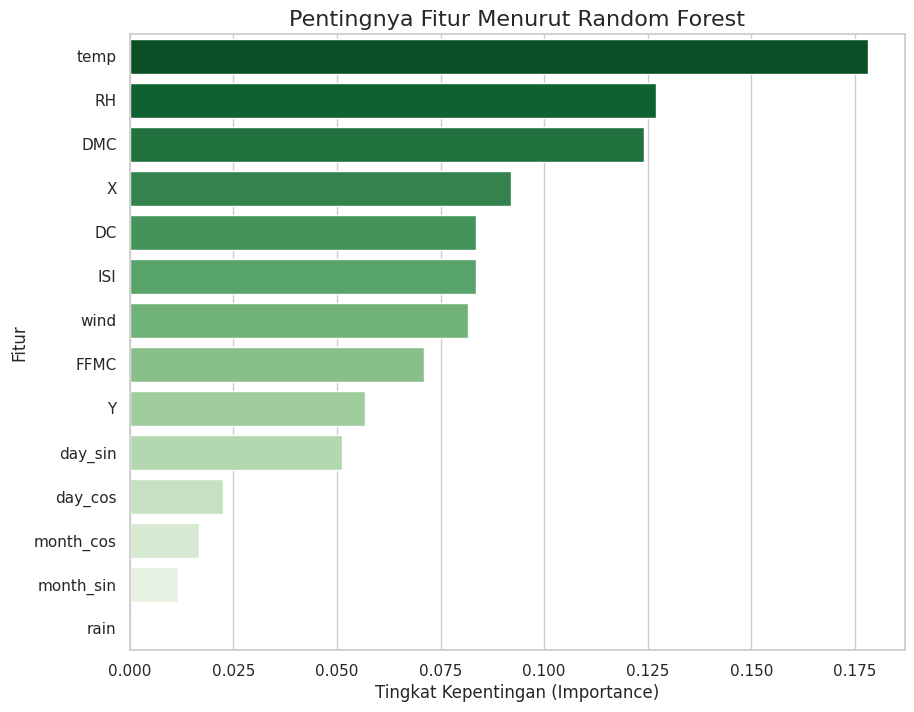

In [44]:
# Mengambil model Random Forest yang sudah dilatih
rf_model = trained_models['Random Forest']
# Mengambil nama-nama fitur
feature_names = feature_cols

# Membuat DataFrame untuk importance
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False) # Diurutkan dari yang paling penting

# Membuat plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=rf_importance_df, palette='Greens_r')
plt.title('Pentingnya Fitur Menurut Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)')
plt.ylabel('Fitur')
plt.show()

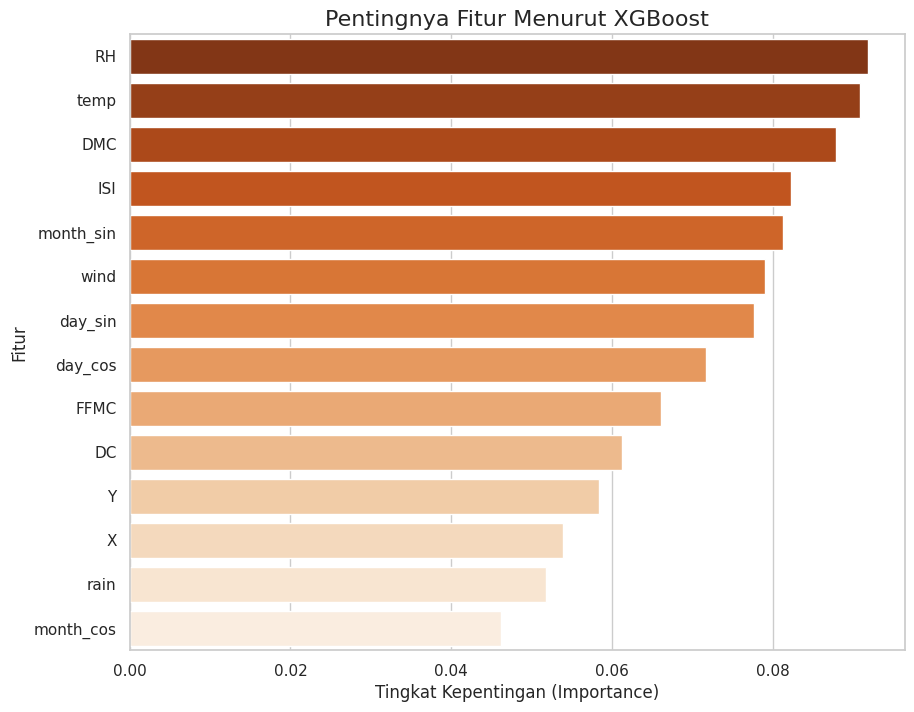

In [45]:
# Mengambil model XGBoost yang sudah dilatih
xgb_model = trained_models['XGBoost']

# Membuat DataFrame untuk importance
xgb_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False) # Diurutkan dari yang paling penting

# Membuat plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=xgb_importance_df, palette='Oranges_r')
plt.title('Pentingnya Fitur Menurut XGBoost', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)')
plt.ylabel('Fitur')
plt.show()

In [46]:
print("\n🏆 5 Fitur Terpenting Menurut XGBoost:")

# Mengambil 5 baris teratas dari DataFrame
top_5_xgb = xgb_importance_df.head(5)

# Looping untuk menampilkan hasilnya
for i, row in enumerate(top_5_xgb.itertuples(), 1):
    print(f"  {i}. {row.feature}: {row.importance:.4f}")


🏆 5 Fitur Terpenting Menurut XGBoost:
  1. RH: 0.0918
  2. temp: 0.0909
  3. DMC: 0.0879
  4. ISI: 0.0823
  5. month_sin: 0.0812


# ================================================================
# STEP 7: Model Comparison dan Visualisasi
# ==================================================================

In [47]:
print("📊 Memulai visualisasi hasil model...")
# Catatan: Kode di bawah ini berasumsi dictionary 'evaluation_results',
# 'all_predictions', dan series 'y_test_orig' sudah ada.

📊 Memulai visualisasi hasil model...


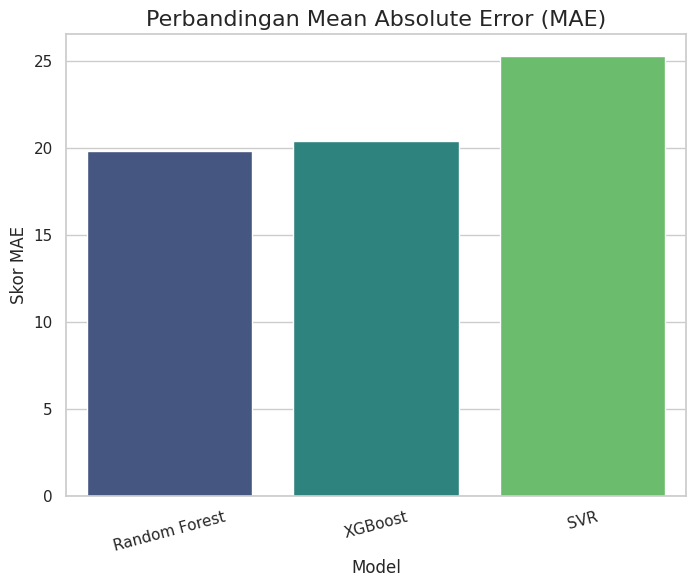

In [48]:
# Menyiapkan data untuk plot
results_df = pd.DataFrame(evaluation_results).T.reset_index().rename(columns={'index':'model'})

# Membuat bar plot untuk MAE
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='MAE', data=results_df.sort_values('MAE'), palette='viridis')
plt.title('Perbandingan Mean Absolute Error (MAE)', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Skor MAE')
plt.xticks(rotation=15)
plt.show()

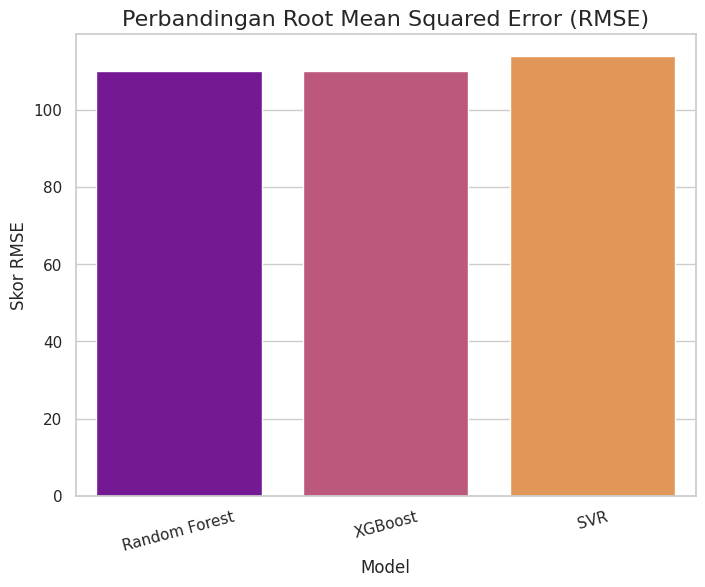

In [49]:
# Membuat bar plot untuk RMSE
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='RMSE', data=results_df.sort_values('RMSE'), palette='plasma')
plt.title('Perbandingan Root Mean Squared Error (RMSE)', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Skor RMSE')
plt.xticks(rotation=15)
plt.show()

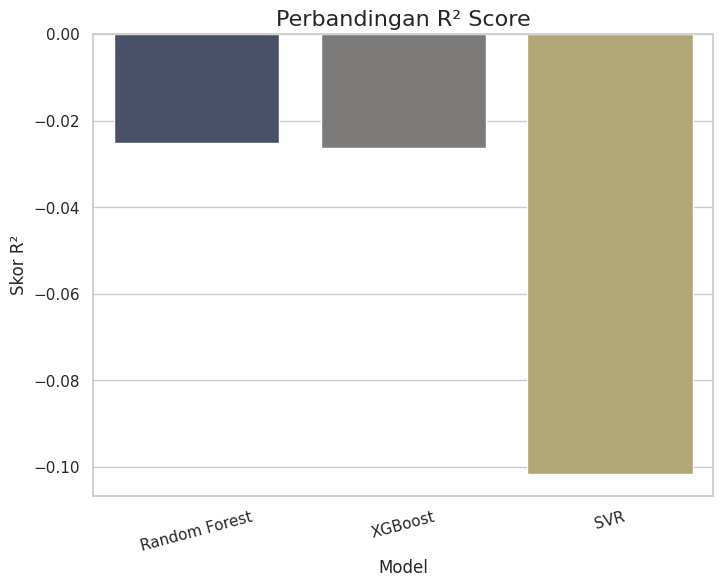

In [50]:
# Membuat bar plot untuk R2
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='R2', data=results_df.sort_values('R2', ascending=False), palette='cividis')
plt.title('Perbandingan R² Score', fontsize=16)
plt.xlabel('Model')
plt.ylabel('Skor R²')
plt.xticks(rotation=15)
plt.show()

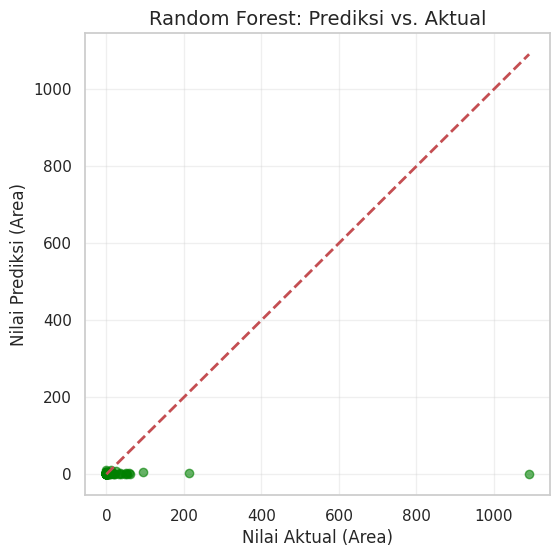

In [51]:
model_name = 'Random Forest'
y_pred = all_predictions[model_name]

plt.figure(figsize=(6, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.6, color='green')
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], 'r--', lw=2) # Garis diagonal
plt.title(f'{model_name}: Prediksi vs. Aktual', fontsize=14)
plt.xlabel('Nilai Aktual (Area)')
plt.ylabel('Nilai Prediksi (Area)')
plt.grid(True, alpha=0.3)
plt.show()

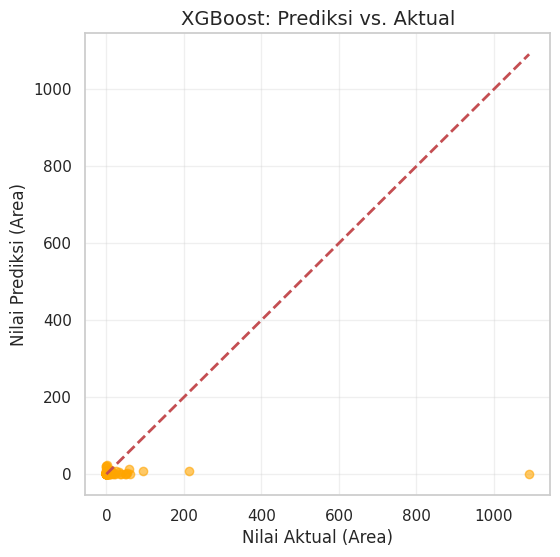

In [52]:
model_name = 'XGBoost'
y_pred = all_predictions[model_name]

plt.figure(figsize=(6, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.6, color='orange')
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], 'r--', lw=2) # Garis diagonal
plt.title(f'{model_name}: Prediksi vs. Aktual', fontsize=14)
plt.xlabel('Nilai Aktual (Area)')
plt.ylabel('Nilai Prediksi (Area)')
plt.grid(True, alpha=0.3)
plt.show()

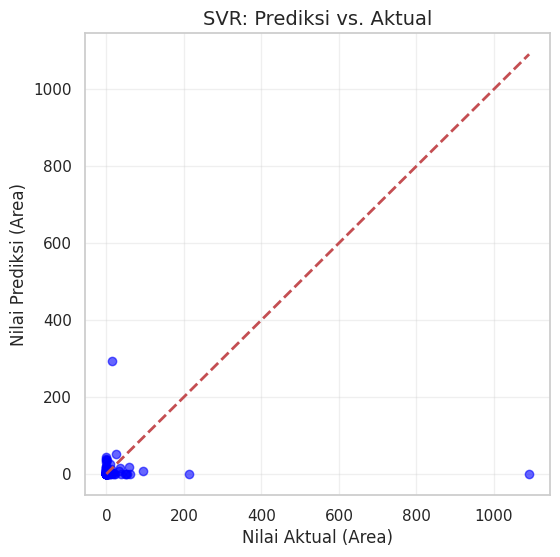

In [53]:
model_name = 'SVR'
y_pred = all_predictions[model_name]

plt.figure(figsize=(6, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.6, color='blue')
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], 'r--', lw=2) # Garis diagonal
plt.title(f'{model_name}: Prediksi vs. Aktual', fontsize=14)
plt.xlabel('Nilai Aktual (Area)')
plt.ylabel('Nilai Prediksi (Area)')
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================
# STEP 8: Hyperparameter Tuning
# ==============================================================

In [54]:
print("🔧 Memulai proses hyperparameter tuning...")
print("Model yang akan di-tuning: Random Forest (sebagai contoh).")
# Catatan: Kode di bawah ini berasumsi variabel X_train dan y_train_log sudah tersedia.

🔧 Memulai proses hyperparameter tuning...
Model yang akan di-tuning: Random Forest (sebagai contoh).


In [55]:
# Mendefinisikan kombinasi hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200],         # Jumlah pohon dalam forest
    'max_depth': [10, 15, None],        # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5],        # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2]          # Jumlah minimum sampel di daun
}

print("🔍 Parameter grid untuk Random Forest telah ditentukan.")
print(param_grid)

🔍 Parameter grid untuk Random Forest telah ditentukan.
{'n_estimators': [100, 200], 'max_depth': [10, 15, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [56]:
# 1. Membuat model dasar
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# 2. Membuat objek GridSearchCV
#    - cv=5: Menggunakan 5-fold cross-validation
#    - scoring='neg_mean_absolute_error': Metrik untuk evaluasi
#    - n_jobs=-1: Menggunakan semua core CPU yang tersedia
#    - verbose=2: Menampilkan log proses
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# 3. Menjalankan pencarian
print("\n⏳ Memulai Grid Search... Proses ini mungkin memakan waktu beberapa menit.")
grid_search.fit(X_train, y_train_log)

print("\n✅ Proses Grid Search selesai!")


⏳ Memulai Grid Search... Proses ini mungkin memakan waktu beberapa menit.
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Proses Grid Search selesai!


In [57]:
print("\n🎉 HASIL HYPERPARAMETER TUNING")
print("="*40)

# Menampilkan parameter terbaik yang ditemukan
print(f"Parameter Terbaik: {grid_search.best_params_}")

# Menampilkan skor MAE terbaik dari hasil cross-validation
# (Kita negasikan lagi karena skornya 'neg_mean_absolute_error')
print(f"Skor CV MAE Terbaik: {-grid_search.best_score_:.4f}")

# Menyimpan model terbaik yang sudah dilatih dengan parameter optimal
best_tuned_model = grid_search.best_estimator_

print("\nModel terbaik sudah disimpan dalam variabel 'best_tuned_model'.")


🎉 HASIL HYPERPARAMETER TUNING
Parameter Terbaik: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Skor CV MAE Terbaik: 1.1901

Model terbaik sudah disimpan dalam variabel 'best_tuned_model'.


# ==============================================================
# STEP 10: Model Deployment Simulation
# ================================================================

In [58]:
print("\n🚀 Simulasi Penerapan Model pada 5 Kasus Baru")
print("=" * 50)

# Model yang akan kita gunakan adalah model terbaik dari langkah sebelumnya
final_model = best_tuned_model

# Kita akan menggunakan 5 sampel pertama dari data uji (X_test)
# dan nilai aktualnya (y_test_orig) untuk perbandingan
num_simulations = 5

for i in range(num_simulations):
    # 1. Ambil satu baris data sebagai sampel baru
    #    Kita gunakan X_test yang tidak diskalakan karena model Random Forest kita dilatih di atasnya.
    X_sample = X_test.iloc[i:i+1]

    # 2. Ambil nilai aktual yang sesuai untuk perbandingan
    actual_area = y_test_orig.iloc[i]

    # 3. Lakukan prediksi pada sampel baru
    #    Model akan menghasilkan prediksi dalam skala log
    pred_log = final_model.predict(X_sample)[0]

    # 4. Kembalikan hasil prediksi ke skala aslinya (hektar)
    pred_area = np.expm1(pred_log)

    # 5. Klasifikasikan level risiko berdasarkan luas area prediksi
    if pred_area < 0.1: # Memberi sedikit toleransi untuk nilai yang mendekati nol
        risk_level = "✅ RENDAH"
    elif pred_area <= 1:
        risk_level = "⚠️ SEDANG"
    elif pred_area <= 10:
        risk_level = "🔥 TINGGI"
    else:
        risk_level = "🔥🔥 SANGAT TINGGI"

    # 6. Cetak hasil simulasi dengan format yang rapi
    print(f"\n📊 KASUS SIMULASI #{i+1}")
    print("-" * 30)
    print(f"   Prediksi Luas Terbakar: {pred_area:.2f} hektar")
    print(f"   Aktual Luas Terbakar:   {actual_area:.2f} hektar")
    print(f"   Level Risiko Prediksi:  {risk_level}")


🚀 Simulasi Penerapan Model pada 5 Kasus Baru

📊 KASUS SIMULASI #1
------------------------------
   Prediksi Luas Terbakar: 1.20 hektar
   Aktual Luas Terbakar:   0.00 hektar
   Level Risiko Prediksi:  🔥 TINGGI

📊 KASUS SIMULASI #2
------------------------------
   Prediksi Luas Terbakar: 1.48 hektar
   Aktual Luas Terbakar:   0.00 hektar
   Level Risiko Prediksi:  🔥 TINGGI

📊 KASUS SIMULASI #3
------------------------------
   Prediksi Luas Terbakar: 2.30 hektar
   Aktual Luas Terbakar:   1.23 hektar
   Level Risiko Prediksi:  🔥 TINGGI

📊 KASUS SIMULASI #4
------------------------------
   Prediksi Luas Terbakar: 2.20 hektar
   Aktual Luas Terbakar:   1.46 hektar
   Level Risiko Prediksi:  🔥 TINGGI

📊 KASUS SIMULASI #5
------------------------------
   Prediksi Luas Terbakar: 2.16 hektar
   Aktual Luas Terbakar:   1.95 hektar
   Level Risiko Prediksi:  🔥 TINGGI
